In [ ]:
import pandas as pd

In [ ]:
df = pd.read_csv('datasetcombine.csv')

In [ ]:
selected_features = [
    'ProcessImageEntropy',
    'SensitiveKeysAccessed',
    'RegistryValueEntropyAvg', 'IS_MALWARE'
]
X = df[selected_features]

In [ ]:
X[selected_features].nunique().sort_values()


,0
IS_MALWARE,2
ProcessImageEntropy,59
SensitiveKeysAccessed,97
RegistryValueEntropyAvg,166


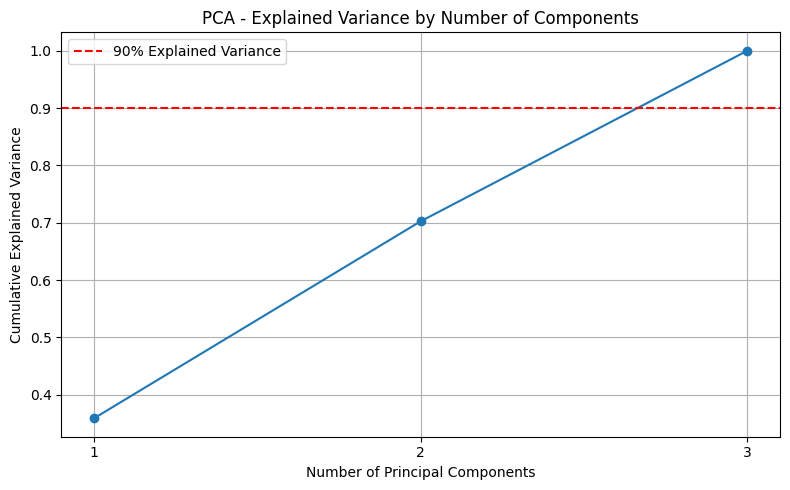

In [ ]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
import numpy as np

scaler = StandardScaler()
X_cluster = X.drop(columns='IS_MALWARE')
X_scaled = scaler.fit_transform(X_cluster)
pca = PCA().fit(X_scaled)

cumulative_variance = np.cumsum(pca.explained_variance_ratio_)

plt.figure(figsize=(8,5))
plt.plot(range(1, len(cumulative_variance)+1), cumulative_variance, marker='o', linestyle='-')
plt.axhline(y=0.9, color='r', linestyle='--', label='90% Explained Variance')  # garis bantu
plt.xticks(range(1, len(cumulative_variance)+1))
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('PCA - Explained Variance by Number of Components')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


In [ ]:
pca = PCA(n_components=2)
X_scaled = pca.fit_transform(X_scaled)

In [ ]:
# features_to_check = [col for col in selected_features if col != 'IS_MALWARE']

# outlier_mask = pd.Series(False, index=X.index)

# print("=== Deteksi Outlier per Kolom (IQR Method) ===")
# for col in features_to_check:
#     Q1 = X[col].quantile(0.25)
#     Q3 = X[col].quantile(0.75)
#     IQR = Q3 - Q1
#     lower_bound = Q1 - 1.5 * IQR
#     upper_bound = Q3 + 1.5 * IQR

#     col_outliers = (X[col] < lower_bound) | (X[col] > upper_bound)
#     outlier_count = col_outliers.sum()
#     outlier_mask |= col_outliers

#     print(f"Kolom '{col}': {outlier_count} outlier")

# total_outlier_rows = outlier_mask.sum()

# malware_lost = X.loc[outlier_mask, 'IS_MALWARE'].sum()

# print("\n=== Summary ===")
# print(f"Total baris outlier unik (terdampak minimal satu kolom): {total_outlier_rows}")
# print(f"Jumlah data dengan IS_MALWARE = 1 yang akan hilang jika outlier dihapus: {int(malware_lost)}")

In [ ]:
from sklearn.ensemble import IsolationForest

from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns




model = IsolationForest(contamination=0.05, random_state=42)
y_pred = model.fit_predict(X_scaled)


df['Anomaly'] = y_pred

print(df['Anomaly'].value_counts())

if 'IS_MALWARE' in df.columns:
    from sklearn.metrics import classification_report
    print(classification_report(df['IS_MALWARE'], df['Anomaly'].replace({1: 0, -1: 1})))

Anomaly
 1    1588
-1      84
Name: count, dtype: int64
              precision    recall  f1-score   support

           0       0.96      0.96      0.96      1595
           1       0.23      0.25      0.24        77

    accuracy                           0.93      1672
   macro avg       0.59      0.60      0.60      1672
weighted avg       0.93      0.93      0.93      1672



In [ ]:
from sklearn.svm import OneClassSVM

ocsvm = OneClassSVM(kernel='rbf', gamma='scale', nu=0.05)
ocsvm.fit(X_scaled)

y_pred_ocsvm = ocsvm.predict(X_scaled)

df['Anomaly_OCSVM'] = y_pred_ocsvm
print(df['Anomaly_OCSVM'].value_counts())
if 'IS_MALWARE' in df.columns:
    print(classification_report(df['IS_MALWARE'], df['Anomaly_OCSVM'].replace({1: 0, -1: 1})))

Anomaly_OCSVM
 1    1583
-1      89
Name: count, dtype: int64
              precision    recall  f1-score   support

           0       0.97      0.96      0.97      1595
           1       0.33      0.38      0.35        77

    accuracy                           0.94      1672
   macro avg       0.65      0.67      0.66      1672
weighted avg       0.94      0.94      0.94      1672



In [ ]:
from sklearn.neighbors import LocalOutlierFactor

lof = LocalOutlierFactor(n_neighbors=20, contamination=0.05)
y_pred_lof = lof.fit_predict(X_scaled)

df['Anomaly_LOF'] = y_pred_lof
print(df['Anomaly_LOF'].value_counts())
if 'IS_MALWARE' in df.columns:
    print(classification_report(df['IS_MALWARE'], df['Anomaly_LOF'].replace({1: 0, -1: 1})))


Anomaly_LOF
 1    1590
-1      82
Name: count, dtype: int64
              precision    recall  f1-score   support

           0       0.96      0.96      0.96      1595
           1       0.18      0.19      0.19        77

    accuracy                           0.92      1672
   macro avg       0.57      0.58      0.57      1672
weighted avg       0.93      0.92      0.92      1672



/usr/local/lib/python3.11/dist-packages/sklearn/neighbors/_lof.py:322: UserWarning: Duplicate values are leading to incorrect results. Increase the number of neighbors for more accurate results.
  warnings.warn(
